In [7]:
import os
import re

In [3]:
METRIC_LITERA = 'BLEU4'

In [4]:
SCORE_DIR = 'scores'
MODEL_DIR = 'iwslt14'

scores_path = os.path.join(MODEL_DIR, SCORE_DIR)

In [40]:
filenames = []
scores = []

for score_filename in os.listdir(scores_path):
    score_path = os.path.join(scores_path, score_filename)
    
    score_lines = []
    with open(score_path) as input_stream:
        score_lines = input_stream.readlines()
        
    score_line = score_lines[-1]
    score_list = re.split(',|\s|=', score_line)
    metric_idx = score_list.index(METRIC_LITERA) + 3
    
    score = float(score_list[metric_idx])
    scores.append(score)
    filenames.append(score_filename)

In [45]:
beam_widths = [int(x.replace('.out', '')) for x in filenames]

In [46]:
beam_widths

[30, 5, 3, 1, 10, 7, 2, 50, 40, 6, 20, 4, 8, 9]

In [47]:
scores

[34.9,
 34.75,
 34.68,
 34.02,
 34.89,
 34.8,
 34.48,
 34.89,
 34.88,
 34.8,
 34.9,
 34.72,
 34.87,
 34.89]

In [50]:
import matplotlib.pyplot as plt

In [54]:
import numpy as np

In [55]:
args_s = np.argsort(beam_widths)

In [56]:
beam_widths = np.array(beam_widths)
scores = np.array(scores)

In [58]:
beam_widths = beam_widths[args_s]
scores = scores[args_s]

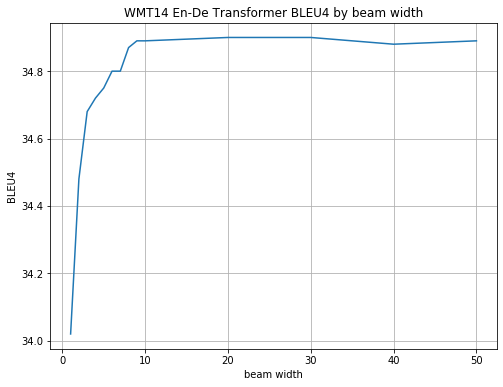

In [61]:
plt.figure(figsize=(8, 6))

plt.plot(beam_widths, scores)
plt.xlabel('beam width')
plt.ylabel('BLEU4')
plt.title('WMT14 En-De Transformer BLEU4 by beam width')
plt.grid()